In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# mouse_drug_data.head()
# clinical_trial_data.head()

# Combine the data into a single dataset
merged_data = pd.merge(clinical_trial_data,mouse_drug_data,how="left", on="Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

t_response_mean = merged_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()
t_response_mean

# Convert to DataFrame

tumor_response_df = pd.DataFrame(t_response_mean)
tumor_response_df = tumor_response_df.reset_index(drop=False)

# Preview DataFrame

tumor_response_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
t_error = merged_data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
t_error
# Convert to DataFrame

tumor_response_error = pd.DataFrame(t_error)
tumor_response_error = tumor_response_error.reset_index(drop=False)

# Preview DataFrame

tumor_response_error.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames

tumor_response_df_pivot = tumor_response_df.copy()


# Preview that Reformatting worked
tumor_response_df_pivot.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Calculating means - Capomulin
capomulin_means = tumor_response_df.loc[tumor_response_df["Drug"]=="Capomulin","Tumor Volume (mm3)"]
capomulin_means

#Calculating standard error - Capomulin
capomulin_error = tumor_response_error.loc[tumor_response_error["Drug"]=="Capomulin","Tumor Volume (mm3)"]
capomulin_error

# Calculating means - Ketapril
ketapril_means = tumor_response_df.loc[tumor_response_df["Drug"]=="Ketapril","Tumor Volume (mm3)"]
ketapril_means

#Calculating standard error - Ketapril
ketapril_error = tumor_response_error.loc[tumor_response_error["Drug"]=="Ketapril","Tumor Volume (mm3)"]
ketapril_error

# Calculating means - Infubinol
infubinol_means = tumor_response_df.loc[tumor_response_df["Drug"]=="Infubinol","Tumor Volume (mm3)"]
infubinol_means

#Calculating standard error - Infubinol
infubinol_error = tumor_response_error.loc[tumor_response_error["Drug"]=="Infubinol","Tumor Volume (mm3)"]
infubinol_error

# Calculating means - Placebo
placebo_means = tumor_response_df.loc[tumor_response_df["Drug"]=="Placebo","Tumor Volume (mm3)"]
placebo_means

#Calculating standard error - Placebo
placebo_error = tumor_response_error.loc[tumor_response_error["Drug"]=="Placebo","Tumor Volume (mm3)"]
placebo_error


50    0.000000
51    0.218091
52    0.402064
53    0.614461
54    0.839609
55    1.034872
56    1.218231
57    1.287481
58    1.370634
59    1.351726
Name: Tumor Volume (mm3), dtype: float64

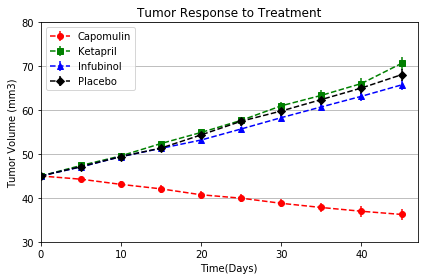

In [6]:
# Generate the Plot (with Error Bars)

#Define x-axis
x_axis = np.arange(0,50,5)

#Plot 
plt.errorbar(x_axis, capomulin_means, capomulin_error,marker = "o",linestyle="dashed",color="red",label = "Capomulin")
plt.errorbar(x_axis, ketapril_means, ketapril_error,marker = "s",linestyle="dashed",color="green",label = "Ketapril")
plt.errorbar(x_axis, infubinol_means, infubinol_error,marker = "^",linestyle="dashed",color="blue",label = "Infubinol")
plt.errorbar(x_axis, placebo_means, placebo_error,marker = "D",linestyle="dashed",color="black",label = "Placebo")

#Set limits
plt.ylim(30, 80)
plt.xlim(0, (max(x_axis)+2))

#Labels and Title
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")

#Legend
plt.legend(loc="best")

#Grid only on y axis
plt.grid(axis="y")

plt.tight_layout()

#Save Figure
plt.savefig("treatment.png")


In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

metastatic_data = merged_data[["Mouse ID","Timepoint","Metastatic Sites","Drug"]].copy()
metastatic_data

meta_mean = metastatic_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
meta_mean

# Convert to DataFrame

metastatic_mean_df = pd.DataFrame(meta_mean)
metastatic_mean_df = metastatic_mean_df.reset_index(drop=False)

# Preview DataFrame
metastatic_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

metastatic_error = metastatic_data.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
metastatic_error.head()

# Convert to DataFrame

metastatic_error_df = pd.DataFrame(metastatic_error)


# Preview DataFrame
metastatic_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
metastatic_error_df = metastatic_error_df.reset_index()
metastatic_mean_df_pivot = metastatic_mean_df.copy()
metastatic_mean_df_pivot.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [11]:
# Calculating means - Capomulin
capomulin_mmeans=metastatic_mean_df.loc[metastatic_mean_df["Drug"]=="Capomulin","Metastatic Sites"]
capomulin_mmeans

#Calculating standard error - Capomulin
capomulin_merror=metastatic_error_df.loc[metastatic_error_df["Drug"]=="Capomulin","Metastatic Sites"]
capomulin_merror

# Calculating means - Ketapril
ketapril_mmeans=metastatic_mean_df.loc[metastatic_mean_df["Drug"]=="Ketapril","Metastatic Sites"]
ketapril_mmeans

#Calculating standard error - Ketapril
ketapril_merror=metastatic_error_df.loc[metastatic_error_df["Drug"]=="Ketapril","Metastatic Sites"]
ketapril_merror

# Calculating means - Infubinol
infubinol_mmeans=metastatic_mean_df.loc[metastatic_mean_df["Drug"]=="Infubinol","Metastatic Sites"]
infubinol_mmeans

#Calculating standard error - Infubinol
infubinol_merror=metastatic_error_df.loc[metastatic_error_df["Drug"]=="Infubinol","Metastatic Sites"]
infubinol_merror

# Calculating means - Placebo
placebo_mmeans=metastatic_mean_df.loc[metastatic_mean_df["Drug"]=="Placebo","Metastatic Sites"]
placebo_mmeans

#Calculating standard error - Placebo
placebo_merror=metastatic_error_df.loc[metastatic_error_df["Drug"]=="Placebo","Metastatic Sites"]
placebo_merror

50    0.000000
51    0.100947
52    0.115261
53    0.190221
54    0.234064
55    0.263888
56    0.300264
57    0.341412
58    0.297294
59    0.304240
Name: Metastatic Sites, dtype: float64

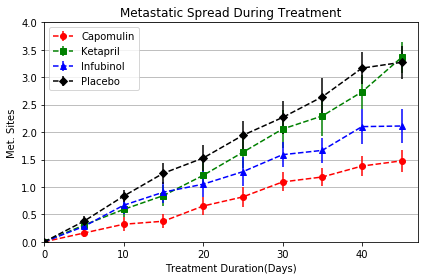

In [12]:
# Generate the Plot (with Error Bars)

#Define x_axis
x_axis1 = np.arange(0,50,5)

#Plot
plt.errorbar(x_axis1, capomulin_mmeans, capomulin_merror,marker = "o",linestyle="dashed",color="red",label = "Capomulin")
plt.errorbar(x_axis1, ketapril_mmeans, ketapril_merror,marker = "s",linestyle="dashed",color="green",label = "Ketapril")
plt.errorbar(x_axis1, infubinol_mmeans, infubinol_merror,marker = "^",linestyle="dashed",color="blue",label = "Infubinol")
plt.errorbar(x_axis1, placebo_mmeans, placebo_merror,marker = "D",linestyle="dashed",color="black",label = "Placebo")

#Set limits
plt.ylim(0,4)
plt.xlim(0,max(x_axis1)+2)

#Labels and Title
plt.xlabel("Treatment Duration(Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

#Legend
plt.legend(loc="best")

#Grid only on y axis
plt.grid(axis="y")
plt.tight_layout()

# Save the Figure
plt.savefig("metastatic_spread.png")


![Metastatic Spread During Treatment](../Images/spread.png)

In [13]:
# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_data_df=merged_data[["Mouse ID","Timepoint","Drug"]].copy()
mice_data_df

mice_count=mice_data_df.groupby(['Drug', 'Timepoint']).count()
mice_count.head()

# Convert to DataFrame
survival_rate=pd.DataFrame(mice_count)
survival_rate
survival_rate=survival_rate.reset_index(drop=False)

# Preview DataFrame
survival_rate.head(5)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame

survival_rate_df=survival_rate.copy()
survival_rate_df.pivot(index="Timepoint",columns="Drug",values="Mouse ID")


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [16]:
#Calculate the percentages
survival_percent_df = pd.DataFrame({"Drug" : survival_rate["Drug"], 
                                    "Timepoint": survival_rate["Timepoint"],
                                    "Survival Percentage" : 
                    survival_rate["Mouse ID"] /survival_rate["Mouse ID"].max() * 100})
survival_percent_df.head()

,Drug,Timepoint,Survival Percentage
0,Capomulin,0,96.153846
1,Capomulin,5,96.153846
2,Capomulin,10,96.153846
3,Capomulin,15,92.307692
4,Capomulin,20,88.461538


In [17]:
p_capomulin=survival_percent_df.loc[survival_percent_df["Drug"]=="Capomulin","Survival Percentage"]
p_capomulin
p_ketapril=survival_percent_df.loc[survival_percent_df["Drug"]=="Ketapril","Survival Percentage"]
p_ketapril
p_infubinol=survival_percent_df.loc[survival_percent_df["Drug"]=="Infubinol","Survival Percentage"]
p_infubinol
p_placebo=survival_percent_df.loc[survival_percent_df["Drug"]=="Placebo","Survival Percentage"]
p_placebo

50    96.153846
51    92.307692
52    92.307692
53    76.923077
54    73.076923
55    65.384615
56    57.692308
57    53.846154
58    46.153846
59    42.307692
Name: Survival Percentage, dtype: float64

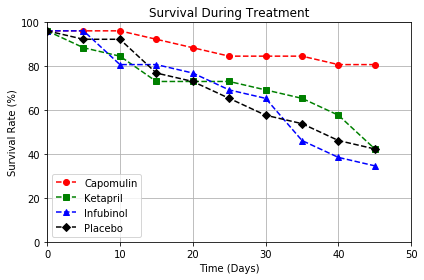

In [18]:
# Generate the Plot (Accounting for percentages)
x_axis2 = np.arange(0,50,5)

#Plot 
plt.errorbar(x_axis2, p_capomulin, marker = "o",linestyle="dashed",color="red",label = "Capomulin")
plt.errorbar(x_axis2, p_ketapril, marker = "s",linestyle="dashed",color="green",label = "Ketapril")
plt.errorbar(x_axis2, p_infubinol, marker = "^",linestyle="dashed",color="blue",label = "Infubinol")
plt.errorbar(x_axis2, p_placebo, marker = "D",linestyle="dashed",color="black",label = "Placebo")

#Set limits
plt.ylim(0,100)
plt.xlim(0, 50)

#Labels and Title
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")

#Legend
plt.legend(loc="best")

#Grid only on y axis
plt.grid()
plt.tight_layout()

# Save the Figure
plt.savefig("survival.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [19]:
# Calculate the percent changes for each drug

#Calculate the highest value in timepoint, because it is uniform throught the data
#This highest value can be constantly used to calculate percent changes
max_tpoint = tumor_response_df["Timepoint"].max()

#Capomulin - Calculation
rec_Capomulin = tumor_response_df.loc[tumor_response_df["Drug"]=="Capomulin"]
array_Capomulin = rec_Capomulin["Tumor Volume (mm3)"]
v1 = array_Capomulin.reset_index(drop=True)
cp_Capomulin = (v1[9]-v1[0])/max_tpoint*100

#Ketapril - Calculation
rec_Ketapril=tumor_response_df.loc[tumor_response_df["Drug"]=="Ketapril"]
array_Ketapril=rec_Ketapril["Tumor Volume (mm3)"]
v2=array_Ketapril.reset_index(drop=True)
cp_Ketapril= (v2[9]-v2[0])/max_tpoint*100

#Naftisol - Calculation
rec_Naftisol=tumor_response_df.loc[tumor_response_df["Drug"]=="Naftisol"]
array_Naftisol=rec_Naftisol["Tumor Volume (mm3)"]
v3=array_Naftisol.reset_index(drop=True)
cp_Naftisol= (v3[9]-v3[0])/max_tpoint*100

#Infubinol - Calculation
rec_Infubinol=tumor_response_df.loc[tumor_response_df["Drug"]=="Infubinol"]
array_Infubinol=rec_Infubinol["Tumor Volume (mm3)"]
v4=array_Infubinol.reset_index(drop=True)
cp_Infubinol= (v4[9]-v4[0])/max_tpoint*100

#Stelasyn - Calculation
rec_Stelasyn=tumor_response_df.loc[tumor_response_df["Drug"]=="Stelasyn"]
array_Stelasyn=rec_Stelasyn["Tumor Volume (mm3)"]
v5=array_Stelasyn.reset_index(drop=True)
cp_Stelasyn= (v5[9]-v5[0])/max_tpoint*100

#Ramicane - Calculation
rec_Ramicane=tumor_response_df.loc[tumor_response_df["Drug"]=="Ramicane"]
array_Ramicane=rec_Ramicane["Tumor Volume (mm3)"]
v6=array_Ramicane.reset_index(drop=True)
cp_Ramicane= (v6[9]-v6[0])/max_tpoint*100

#Propriva - Calculation
rec_Propriva=tumor_response_df.loc[tumor_response_df["Drug"]=="Propriva"]
array_Propriva=rec_Propriva["Tumor Volume (mm3)"]
v7=array_Propriva.reset_index(drop=True)
cp_Propriva= (v7[9]-v7[0])/max_tpoint*100

#Zoniferol - Calculation
rec_Zoniferol=tumor_response_df.loc[tumor_response_df["Drug"]=="Zoniferol"]
array_Zoniferol=rec_Zoniferol["Tumor Volume (mm3)"]
v8=array_Zoniferol.reset_index(drop=True)
cp_Zoniferol= (v8[9]-v8[0])/max_tpoint*100

#Placebo - Calculation
rec_Placebo=tumor_response_df.loc[tumor_response_df["Drug"]=="Placebo"]
array_Placebo=rec_Placebo["Tumor Volume (mm3)"]
v9=array_Placebo.reset_index(drop=True)
cp_Placebo= (v9[9]-v9[0])/max_tpoint*100

#Ceftamin - Calculation
rec_Ceftamin=tumor_response_df.loc[tumor_response_df["Drug"]=="Ceftamin"]
array_Ceftamin=rec_Ceftamin["Tumor Volume (mm3)"]
v10=array_Ceftamin.reset_index(drop=True)
cp_Ceftamin= (v10[9]-v10[0])/max_tpoint*100
#

#Create dataframe
summary_df=pd.DataFrame({"Drug":["Capomulin","Ketapril","Naftisol","Infubinol","Stelasyn","Ramicane","Propriva","Zoniferol","Placebo","Ceftamin"],
                        "Percent Change":[cp_Capomulin,cp_Ketapril,cp_Naftisol,cp_Infubinol,cp_Stelasyn,cp_Ramicane,cp_Propriva,cp_Zoniferol,cp_Placebo,cp_Ceftamin]})

# Display the data to confirm
summary_df

,Drug,Percent Change
0,Capomulin,-19.475303
1,Ketapril,57.028795
2,Naftisol,53.923347
3,Infubinol,46.123472
4,Stelasyn,52.085134
5,Ramicane,-22.320900
6,Propriva,47.241175
7,Zoniferol,46.579751
8,Placebo,51.297960
9,Ceftamin,42.516492


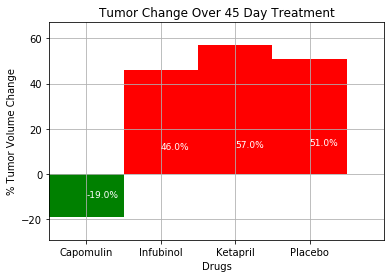

In [20]:

# Store all Relevant Percent Changes into a Tuple
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
summary_tuple = ( round(cp_Capomulin),round(cp_Infubinol),round(cp_Ketapril),round(cp_Placebo))
summary_tuple
drugs_tuple=("Capomulin","Infubinol","Ketapril","Placebo")
drugs_tuple

#Define x_axis
x_axis = np.arange(0, len(summary_tuple))

#Defing colors fot +ve and -ve percent change
colors = ["red" if x > 0 else 'green' for x in summary_tuple]
colors

fig,ax=plt.subplots()
#Plot the bar graph
ax.bar(x_axis, summary_tuple, color = colors, align="center",width=1.0)

#Plot the ticks
tick_location=[value for value in x_axis]
plt.xticks(tick_location,["Capomulin","Infubinol","Ketapril","Placebo"])


#Grid
ax.grid()
ax.set_xlabel("Drugs")
ax.set_ylabel("% Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Day Treatment")

#Set the x-axis and y-axis limits
ax.set_xlim(-0.5,len(drugs_tuple))
ax.set_ylim(min(summary_tuple)-10,max(summary_tuple)+10)


#Adding value labels to bars

for i in range(len(drugs_tuple)):
    if (summary_tuple[i]>0):
        plt.text(x=0+i, y=i+10, s=(str(summary_tuple[i])+"%"), size=9,color="white")
    else:
        plt.text(x=0+i, y=i-10, s=(str(summary_tuple[i])+"%"), size=9,color="white")

# Save the Figure

plt.savefig("Tumor_Change.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

# Observations & Analysis
The Drug Capomulin: (a) It is observed that the drug Capomulin is the most effective of all the drugs. (b) As the day's progressed it was observed that this drug decreased the tumor volume. (c) The metastatic spread to other sites during the course of the treatment was very low compared to the other drugs (d) The survival rate was the highest with the use of this drug.

The Drug Ketapril: (a) It is observed that the drug Ketapril was the least effective among all the drugs. (b) As the day's progressed the tumor volume increased during the treatment. (c) The metastatic spread to the other sites during the course of the treatment was very high. (d) The survival rate of the mice was also observed to be low with the use of this drug.